# Task 1 :  House Price Prediction

# Importing the Libraries

In [16]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To clean the data :
import re

# Machine Learning libraries
from sklearn.model_selection import train_test_split
## for model selection
from sklearn.linear_model import LinearRegression
## to know the Performance/Accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
## for ignoreing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

Link to dataset :: https://raw.githubusercontent.com/NelluriLokesh/Accuracy-using-Multiple-Regression-Models/main/data.csv

In [17]:
data = pd.read_csv(r"https://raw.githubusercontent.com/NelluriLokesh/Accuracy-using-Multiple-Regression-Models/main/data.csv")

In [19]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

# Data analysis - (DC , EDA, DE, DM,DV)

In [23]:
## change the float values into int in the "bedrooms" , "bathrooms" and "floors" columns

data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
data['price'] = data['price'].astype(int)

In [24]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
for i in range(len(data['date'])):
    data['date'][i] = re.sub("00:00:00","",str(data['date'][i]))

In [27]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [28]:
data.drop(columns={'street','country','statezip',"yr_renovated"}, inplace=True)

In [34]:
data.drop(columns={"city"},axis=1,inplace=True)

In [29]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,Shoreline
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,Seattle
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,Kent
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,Bellevue
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,Seattle
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,Bellevue
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,Renton
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,Seattle


In [30]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
city             0
dtype: int64

building_age = current_year - yr_built


In [31]:
# setting the current year
current_age = 2023

In [32]:
data.insert(12,"building_age",current_age - data['yr_built'])

In [33]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built,city
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955,Shoreline
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921,Seattle
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966,Kent
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963,Bellevue
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954,Seattle
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983,Bellevue
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009,Renton
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974,Seattle


# Exploratory Data Analysis 🚀

In [35]:
data_1 = data.copy()

# Check distribution of Target Variable


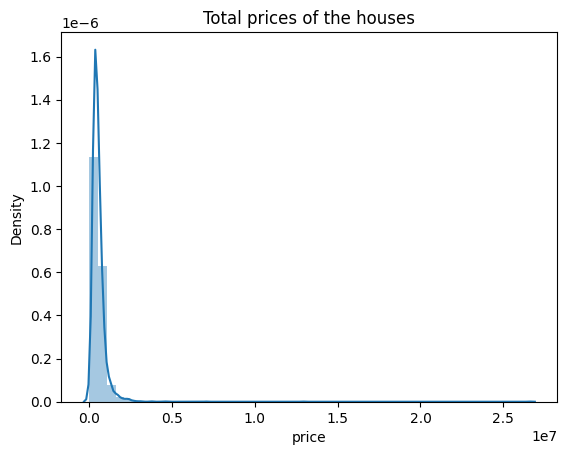

In [36]:
sns.distplot(data_1.price)
plt.title("Total prices of the houses")
plt.show()

Plotting a bar graph between the "price" off the building and "sqft_lot" of the building

Text(0, 0.5, 'sqft of the building')

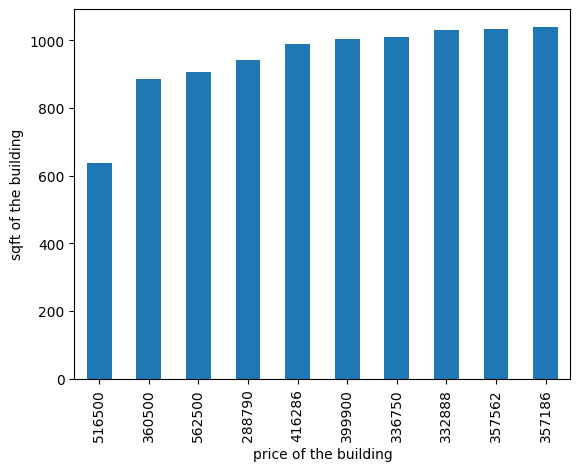

In [58]:
data_1.groupby(['price'])['sqft_lot'].mean().sort_values().head(10).plot.bar()
plt.xlabel("price of the building")
plt.ylabel("sqft of the building")

# Machine Learning🧑‍💻

# 1. Select the Feature and Targets

In [38]:
X = np.array(data_1.iloc[:,1])
Y = np.array(data_1.iloc[:,5])

In [39]:
X

array([ 313000, 2384000,  342000, ...,  416904,  203400,  220600])

In [40]:
Y

array([ 7912,  9050, 11947, ...,  7014,  6630,  8102], dtype=int64)

# 2. splitting the data into 2 sets (train and test)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)

In [42]:
len(x_train),len(x_test),len(y_train),len(y_test)

(2300, 2300, 2300, 2300)

# 3. Chossing the model

In [43]:
lrModel = LinearRegression()

 Reshaping the data


In [44]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

# Fitting the model/ Training the model


In [45]:
lrModel.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [46]:
y_pred = lrModel.predict(x_test.reshape(-1,1))

 Predicted vs Actual

In [47]:
df = pd.DataFrame({"Actual":y_test.reshape(-1),"Predicted":y_pred.reshape(-1)})

In [48]:
df

,Actual,Predicted
0,8000,14299.885002
1,4800,13747.157358
2,6969,14055.656508
3,8209,13846.776875
4,3345,14518.276692
...,...,...
2295,6000,16266.567086
2296,2542,14904.029172
2297,3600,14077.310578
2298,8395,14377.009790


# Performance/Accuracy

In [49]:
r2_score(y_test,y_pred)

0.002581189575260545

In [50]:
mean_squared_error(y_train,y_pred)

1329961674.1271768